In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
boston_df = pd.read_csv('/content/drive/MyDrive/ca.webinars/Introduction to ML Pipelines/data/boston.csv')

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = boston_df.drop(['MEDV'], axis=1)
y = boston_df['MEDV']

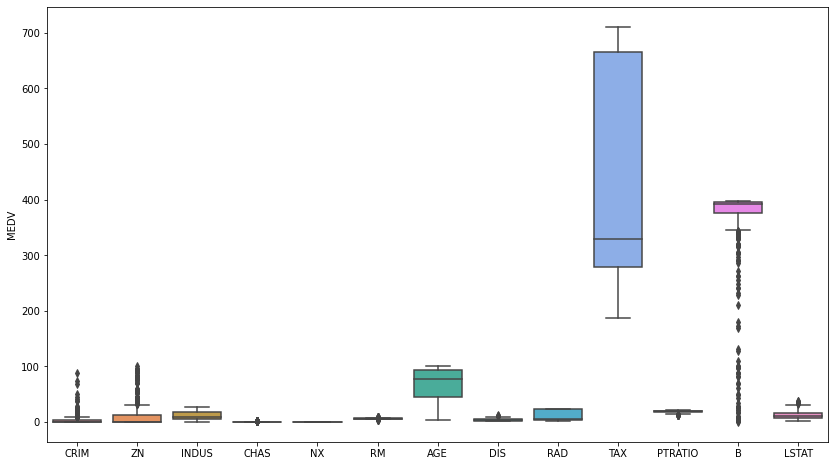

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(X))
ax.set_xlabel('')
ax.set_ylabel('MEDV')
plt.show()

## Step 1 - Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
scaled_df = pd.DataFrame(X_scaled, columns=list(X_train))

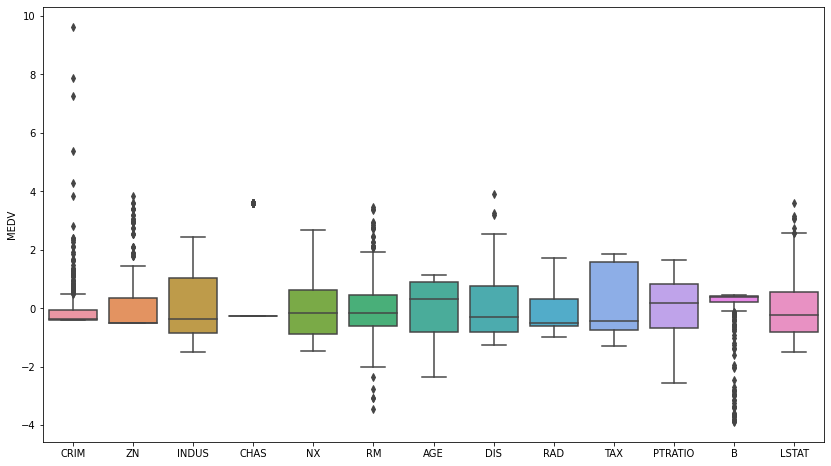

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(scaled_df))
ax.set_xlabel('')
ax.set_ylabel('MEDV')
plt.show()

### Step 2: Fit a Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
knn = Ridge()
knn.fit(X_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Step 3: Predict 

In [ ]:
knn.predict(X_test)

array([  -91.44318774,    31.36106361,  -838.78182395,  -100.37911264,
        -728.87509352,  -304.4725798 ,  -154.03334812,  -400.02049337,
        -702.33875526,  -271.93433053,   -88.32626929,  -157.25621163,
       -1179.57906695,  -290.78908903,  -103.0386433 ,  -713.84130718,
          34.66443821,  -803.33300607,    59.03595718,  -724.11529854,
          54.6720123 ,    16.52422265,  -218.69086244,   -70.66626516,
        -798.5782694 ,  -774.9045924 ,  -264.80643424, -1164.42796808,
        -101.88355413,  -271.47272158,  -113.53333768,   -73.36713012,
        -710.77692449,  -709.87480172,  -805.10387632,  -444.35383404,
           6.52606609,    19.62011713,  -100.82460466,  -122.38877006,
        -298.22497119,    65.92642893,   120.03132475,  -191.15628092,
         -57.46558   ,  -721.01999957,  -203.83391445,  -111.46573815,
        -712.08814837,   -70.0651699 ,  -130.27363801,    75.68064805,
        -160.86846865,  -240.47563147,     6.59386827,  -696.97828529,
      

In [ ]:
knn.score(X_test, y_test)

-3761.5433705953924

#### Scaled

In [ ]:
knn.predict(scaler.transform(X_test))

array([28.97307596, 35.97429236, 14.93254622, 25.02130988, 18.76446192,
       23.26090165, 17.68256026, 14.37833416, 22.96211665, 20.65480553,
       24.87910275, 18.67411823, -6.03921974, 21.78224704, 19.24321152,
       26.16102734, 20.55326598,  5.79384629, 40.44060391, 17.61031244,
       27.20981135, 30.0056997 , 11.39081164, 24.17107368, 17.84625508,
       15.79499137, 22.78805668, 14.59494253, 22.43852625, 19.22345411,
       22.41168964, 25.2196302 , 25.9221694 , 17.68422422, 16.73726487,
       16.99674834, 31.23599444, 20.13371207, 23.77229652, 24.62738132,
       13.97644015, 32.1714502 , 42.57101602, 17.3682974 , 27.27894259,
       16.97268569, 14.10371024, 25.8982726 , 20.26163484, 29.97988377,
       21.31056501, 34.29163166, 16.08814404, 26.24979988, 39.49245918,
       22.55563797, 18.83893527, 32.64536221, 25.07049278, 12.92705429,
       22.6986857 , 30.45208618, 31.48183317, 15.9251363 , 20.33533745,
       16.71787098, 20.50681788, 25.95241446, 30.56491219, 11.60

In [ ]:
knn.score(scaler.transform(X_test), y_test)

0.6684624359643556

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_train, knn.predict(scaler.transform(X_train))))

4.652176971845967

### Step 4: Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ml_pipe = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('model', Ridge())
    ]
)

In [ ]:
ml_pipe.fit(X_scaled, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [ ]:
ml_pipe.score(scaler.transform(X_test), y_test)

0.6684624359643558

### Step 5: GridSearch CV

In [ ]:
ml_pipe = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('model', Ridge())
    ]
)

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ml_pipe, param_grid = {'model__alpha': np.logspace(-3,3,10)}, cv=10)
cv.fit(X_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'model__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+0

In [ ]:
cv.score(scaler.transform(X_test), y_test)

0.6659677905050337

**End**